## Predict the S&P index price



## Imports


In [1]:
# Standard Libraries
import math

# External Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Data sources
Intially data was scrapped from https://stooq.pl. This dataset does not contain all history of price.
That's why I choosed fetching data directly from **Yahoo Finance API** https://pypi.org/project/yfinance/



In [1]:
sp500 = yf.Ticker("^GSPC")
# ^ -> stock index
# GSPC -> General Standard & Poor's Composite
sp500

NameError: name 'yf' is not defined

## Picking data range from 1957
On Monday, March 4, 1957, the index was expanded to its current extent of 500 companies and was renamed the S&P 500 Stock Composite Index. - Wikipedia

In [3]:
sp500 = sp500.history(start="1957-03-04", period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1957-03-04 00:00:00-05:00,44.060001,44.060001,44.060001,44.060001,1890000,0.0,0.0
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000,0.0,0.0
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000,0.0,0.0
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000,0.0,0.0
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,0.0,0.0
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.0,0.0
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,0.0,0.0


## Removing unnecessary columns "Dividends" and "Stock Splits"
Dividends and stock splits don't influence on stock price

In [4]:
sp500.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
sp500


,Open,High,Low,Close,Volume
Date,,,,,
1957-03-04 00:00:00-05:00,44.060001,44.060001,44.060001,44.060001,1890000
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000
...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000


## Data overview

In [5]:
sp500.describe()

,Open,High,Low,Close,Volume
count,17095.000000,17095.000000,17095.000000,17095.000000,1.709500e+04
mean,909.582376,943.165696,931.886960,937.884131,1.315261e+09
std,1228.038108,1214.160625,1201.049193,1208.017472,1.809359e+09
min,0.000000,38.980000,38.980000,38.980000,1.260000e+06
25%,0.000000,99.699997,98.110001,98.930000,1.671000e+07
50%,367.399994,369.779999,365.450012,367.480011,1.888700e+08
75%,1305.045044,1312.994995,1295.179993,1305.164978,2.827645e+09
max,6121.430176,6128.180176,6088.740234,6118.709961,1.145623e+10


In [6]:
sp500.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
sp500.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1957-03-04 00:00:00-05:00,44.060001,44.060001,44.060001,44.060001,1890000
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000


In [8]:
sp500.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000
2025-01-30 00:00:00-05:00,6050.750000,6086.640137,6027.459961,6071.169922,4634620000
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000


In [9]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17095 entries, 1957-03-04 00:00:00-05:00 to 2025-01-31 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    17095 non-null  float64
 1   High    17095 non-null  float64
 2   Low     17095 non-null  float64
 3   Close   17095 non-null  float64
 4   Volume  17095 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 801.3 KB


#### Summarized date index

In [10]:
sp500.index.astype(str).to_series().describe()

count                         17095
unique                        17095
top       2025-01-31 00:00:00-05:00
freq                              1
Name: Date, dtype: object

## Adding new column - "Daily_Return"
**Daily return** is the percentage change between the closing prices of two consecutive trading days

In [11]:
sp500['Daily_Return'] = (sp500['Close'].pct_change() * 100).round(2)
sp500

,Open,High,Low,Close,Volume,Daily_Return
Date,,,,,,
1957-03-04 00:00:00-05:00,44.060001,44.060001,44.060001,44.060001,1890000,NaN
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000,0.36
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000,0.02
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000,-0.05
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000,-0.32
...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,-1.46
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.92
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,-0.47


## Plot 1 - SP&500 Price over time

Text(0.5, 0, 'Year')

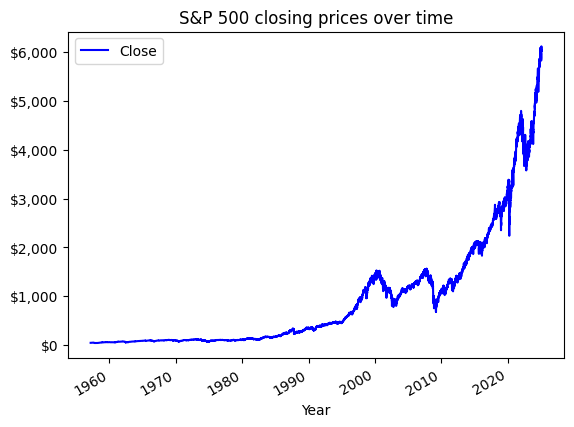

In [12]:
ax = sp500.plot.line(y="Close", use_index=True, color='blue')
ax.set_title("S&P 500 closing prices over time")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel('Year')


## Plot 2 - Daily returns of S&P 500

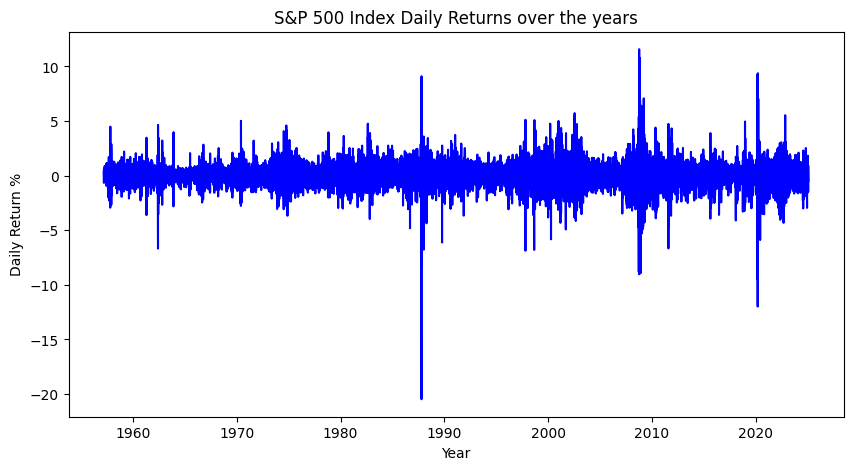

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(sp500['Daily_Return'], color='blue')
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('S&P 500 Index Daily Returns over the years')
plt.show()

## Statistics of Daily Returns

In [14]:
sp500['Daily_Return'].describe()

count    17094.000000
mean         0.033912
std          1.012869
min        -20.470000
25%         -0.420000
50%          0.050000
75%          0.510000
max         11.580000
Name: Daily_Return, dtype: float64

## Plot 3 - Distribution of Daily Returns

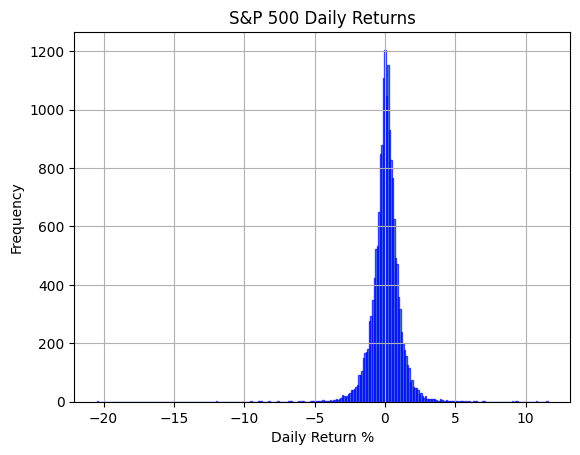

In [15]:
plt.hist(sp500['Daily_Return'], bins=300, alpha=0.7, edgecolor='blue')
plt.title("S&P 500 Daily Returns")
plt.xlabel("Daily Return %")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## Volatility - daily, monthly, annual
Volatility is a measure how much the prices change in a period of time
* High volatility (more risk) - price can rise or fall quickly
* Low volatility (less risk) - price does not change much

Standard deviation - spread of the data around the mean
Square root law - to adjust from daily volatility to longer period of time, multiply the daily by the square root of the number of periods

In [16]:
std_daily = sp500['Daily_Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

## There is in average 21 days of trading days in month
std_monthly = math.sqrt(21) * std_daily
print('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

## There is in average 252 days of trading days in year
std_annual = math.sqrt(252) * std_daily
print('Annual volatility: ', '{:.2f}%'.format(std_annual))

Daily volatility:  1.01%
Monthly volatility:  4.64%
Annual volatility:  16.08%


## Creating new date columns - "Weekday and Day_of_Month"

In [17]:
sp500['Weekday'] = sp500.index.day_name()
sp500['Day_of_Month'] = sp500.index.month
sp500

,Open,High,Low,Close,Volume,Daily_Return,Weekday,Day_of_Month
Date,,,,,,,,
1957-03-04 00:00:00-05:00,44.060001,44.060001,44.060001,44.060001,1890000,NaN,Monday,3
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000,0.36,Tuesday,3
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000,0.02,Wednesday,3
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000,-0.05,Thursday,3
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000,-0.32,Friday,3
...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,-1.46,Monday,1
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.92,Tuesday,1
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,-0.47,Wednesday,1


## Plot 4 - Average Return % by Weekday

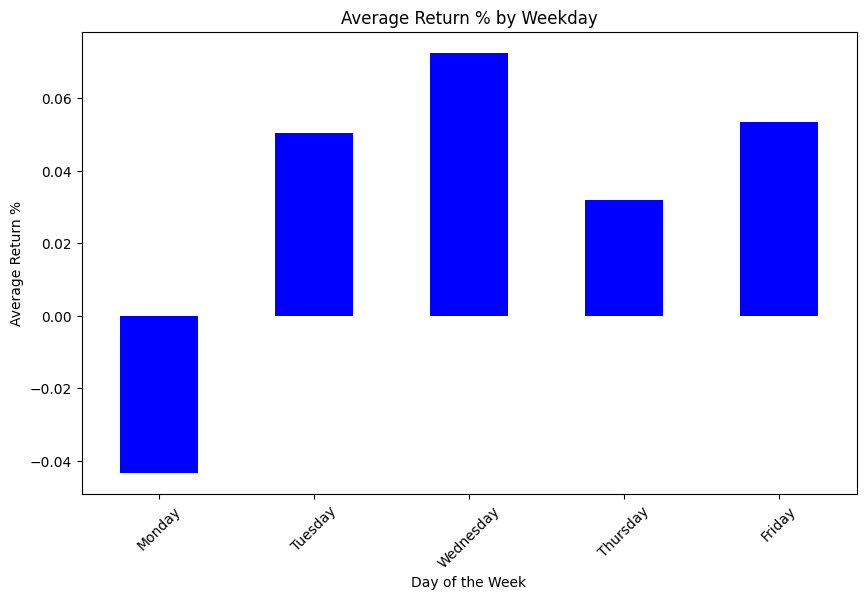

In [18]:
weekday_avg = sp500.groupby('Weekday')['Daily_Return'].mean()

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_avg = weekday_avg[weekdays_order]
plt.figure(figsize=(10, 6))
weekday_avg.plot(kind='bar', color='blue')
plt.title('Average Return % by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Return %')
plt.xticks(rotation=45)
plt.show()

## Plot 5 - Average Return % by Month

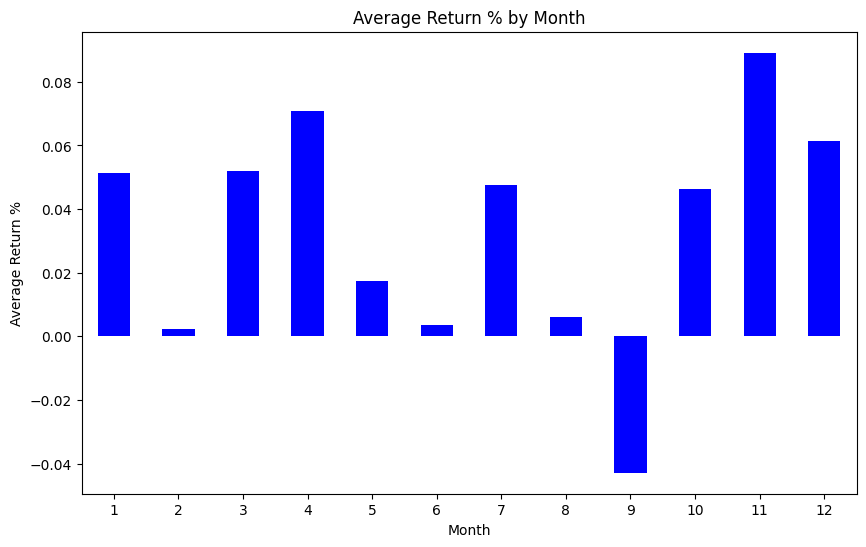

In [19]:
month_avg = sp500.groupby('Day_of_Month')['Daily_Return'].mean()

plt.figure(figsize=(10, 6))
month_avg.plot(kind='bar', color='blue')
plt.title('Average Return % by Month')
plt.xlabel('Month')
plt.ylabel('Average Return %')
plt.xticks(rotation=0)
plt.show()


## Adding column "Tommorow_Close"


In [20]:
sp500['Tommorow_Price'] = sp500['Close'].shift(-1)
sp500['Tommorow_Price']

Date
1957-03-04 00:00:00-05:00      44.220001
1957-03-05 00:00:00-05:00      44.230000
1957-03-06 00:00:00-05:00      44.209999
1957-03-07 00:00:00-05:00      44.070000
1957-03-08 00:00:00-05:00      43.779999
                                ...     
2025-01-27 00:00:00-05:00    6067.700195
2025-01-28 00:00:00-05:00    6039.310059
2025-01-29 00:00:00-05:00    6071.169922
2025-01-30 00:00:00-05:00    6040.529785
2025-01-31 00:00:00-05:00            NaN
Name: Tommorow_Price, Length: 17095, dtype: float64

## Adding target column

In [21]:
sp500['Target'] = (sp500['Tommorow_Price'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Daily_Return,Weekday,Day_of_Month,Tommorow_Price,Target
Date,,,,,,,,,,
1957-03-04 00:00:00-05:00,44.060001,44.060001,44.060001,44.060001,1890000,NaN,Monday,3,44.220001,1
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000,0.36,Tuesday,3,44.230000,1
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000,0.02,Wednesday,3,44.209999,0
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000,-0.05,Thursday,3,44.070000,0
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000,-0.32,Friday,3,43.779999,0
...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,-1.46,Monday,1,6067.700195,1
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.92,Tuesday,1,6039.310059,0
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,-0.47,Wednesday,1,6071.169922,1


## Dropping 2 records with null values (Daily_Return, Tommorow_Price)

In [22]:
print(sp500.isna().sum())
sp500 = sp500.dropna()
sp500

Open              0
High              0
Low               0
Close             0
Volume            0
Daily_Return      1
Weekday           0
Day_of_Month      0
Tommorow_Price    1
Target            0
dtype: int64


,Open,High,Low,Close,Volume,Daily_Return,Weekday,Day_of_Month,Tommorow_Price,Target
Date,,,,,,,,,,
1957-03-05 00:00:00-05:00,44.220001,44.220001,44.220001,44.220001,1860000,0.36,Tuesday,3,44.230000,1
1957-03-06 00:00:00-05:00,44.230000,44.230000,44.230000,44.230000,1840000,0.02,Wednesday,3,44.209999,0
1957-03-07 00:00:00-05:00,44.209999,44.209999,44.209999,44.209999,1830000,-0.05,Thursday,3,44.070000,0
1957-03-08 00:00:00-05:00,44.070000,44.070000,44.070000,44.070000,1630000,-0.32,Friday,3,43.779999,0
1957-03-11 00:00:00-05:00,43.779999,43.779999,43.779999,43.779999,1650000,-0.66,Monday,3,43.750000,0
...,...,...,...,...,...,...,...,...,...,...
2025-01-24 00:00:00-05:00,6121.430176,6128.180176,6088.740234,6101.240234,4214250000,-0.29,Friday,1,6012.279785,0
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,-1.46,Monday,1,6067.700195,1
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.92,Tuesday,1,6039.310059,0


## Transforming Weekday and Day_of_Month cols into dummies

In [23]:
sp500 = pd.get_dummies(sp500, columns=['Weekday', 'Day_of_Month'], drop_first=True).astype(int)
sp500

,Open,High,Low,Close,Volume,Daily_Return,Tommorow_Price,Target,Weekday_Monday,Weekday_Thursday,...,Day_of_Month_3,Day_of_Month_4,Day_of_Month_5,Day_of_Month_6,Day_of_Month_7,Day_of_Month_8,Day_of_Month_9,Day_of_Month_10,Day_of_Month_11,Day_of_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
1957-03-05 00:00:00-05:00,44,44,44,44,1860000,0,44,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1957-03-06 00:00:00-05:00,44,44,44,44,1840000,0,44,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1957-03-07 00:00:00-05:00,44,44,44,44,1830000,0,44,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1957-03-08 00:00:00-05:00,44,44,44,44,1630000,0,43,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1957-03-11 00:00:00-05:00,43,43,43,43,1650000,0,43,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 00:00:00-05:00,6121,6128,6088,6101,4214250000,0,6012,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-01-27 00:00:00-05:00,5969,6017,5962,6012,5198750000,-1,6067,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2025-01-28 00:00:00-05:00,6026,6074,5994,6067,4473640000,0,6039,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Random Forest
#### Features:
* **Reduce overfitting**
* **Reduce bias**
* **Pick non linear tendencies in data**
* **Fast**

#### Key Parameters:
* **Node size**
* **Number of trees**
* **Number of features**

**Information gain** - A measure of how well a feature separates data into less uncertain subsets.

**Decision tree** - A type of model that splits data recursively using decision nodes until only leaf nodes remain.

**Why are decision trees suboptimal?**
Decision trees are highly sensitive to training data; even small changes in the data can result in drastically different trees, making them harder to generalize across datasets.

**Process of Building a Random Forest:**
1. **Bootstrapping**: Sampling with replacement (allowing duplicated rows) and randomly selecting a subset of features for each tree.
2. **Aggregating**: Combining predictions from all trees.
3. **Bagging**: Bootstrapping + Aggregating.

**Tips:**
* How many features to consider?
  Use the **logarithm (log)** or **square root (sqrt)** of the total number of features
* Random Forests can also be applied to regression problems by averaging the predictions of all trees.

## Cross validation
Cross validation is method/way of how data is splitted into training and test datasets.
Cross means that we iteratively change the role of training and test datasets
So, training dataset becomes test and test becomes training

## Data leakage
Data leakage occurs when model has access to data that it should not know when training or predicting ( Leaking data into model)

In this scenario we do not want situation where we ask for predicting tommorow price giving the prices for next 30 days.

## Baseline model


In [24]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# 100 trees with minimum 100 samples in each tree node, ultimately reproducing the same result

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = [col for col in sp500.columns if col not in ['Target', 'Date', 'Tommorow_Price']]
model.fit(train[predictors], train["Target"])
# ## Inside fit model
# # 1. Preprocessing
# # 2. Bagging (Bootstraping and aggregation)
# # 3. Building trees

RandomForestClassifier(min_samples_split=100, random_state=1)

In [25]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds

Date
2024-09-06 00:00:00-04:00    0
2024-09-09 00:00:00-04:00    1
2024-09-10 00:00:00-04:00    1
2024-09-11 00:00:00-04:00    0
2024-09-12 00:00:00-04:00    0
                            ..
2025-01-24 00:00:00-05:00    0
2025-01-27 00:00:00-05:00    0
2025-01-28 00:00:00-05:00    0
2025-01-29 00:00:00-05:00    0
2025-01-30 00:00:00-05:00    0
Length: 100, dtype: int64

## Metrics

In [26]:
y_true = test['Target']
y_pred = preds


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.4300
Precision: 1.0000
Recall: 0.0339
F1 Score: 0.0656
